In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import reedsolo as rs
from reedsolo import ReedSolomonError

Test Case 3

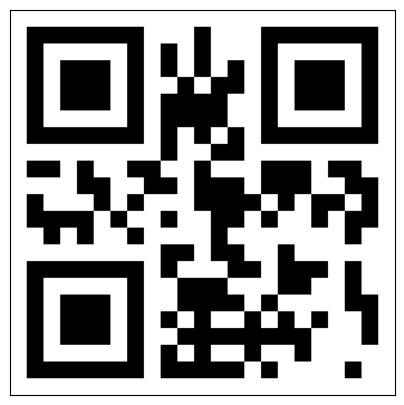

In [12]:
img3 = cv2.imread("03-Leffy-bina-ya-donya.png", cv2.IMREAD_GRAYSCALE)
img3 = cv2.rotate(img3, cv2.ROTATE_180)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img3, cmap='gray');

In [13]:
start_row = -1
start_col = -1
end_row = -1
end_col = -1

for row_index, row in enumerate(img3):
    for pixel in row:
        if pixel != 255:
            start_row = row_index
            break
    if start_row != -1:
        break

for row_index, row in enumerate(img3[::-1]):
    for pixel in row:
        if pixel != 255:
            end_row = img3.shape[0] - row_index
            break
    if end_row != -1:
        break

for col_index, col in enumerate(cv2.transpose(img3)):
    for pixel in col:
        if pixel != 255:
            start_col = col_index
            break
    if start_col != -1:
        break

for col_index, col in enumerate(cv2.transpose(img3)[::-1]):
    for pixel in col:
        if pixel != 255:
            end_col = img3.shape[1] - col_index
            break
    if end_col != -1:
        break

print(start_row, end_row, start_col, end_col)

44 968 44 968


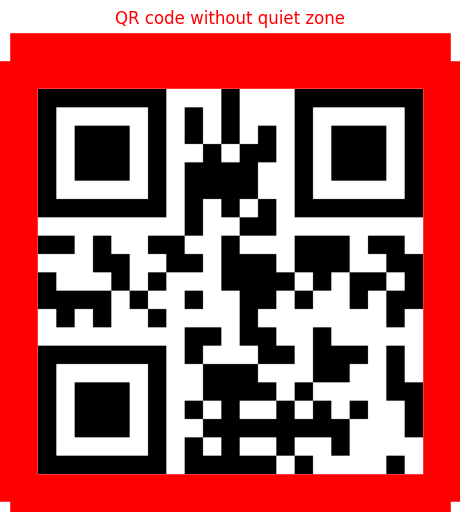

In [14]:
qr_no_quiet_zone_3 = img3[start_row:end_row, start_col:end_col]
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
fig.get_axes()[0].spines[:].set_color('red');
fig.get_axes()[0].spines[:].set_linewidth(40);
fig.get_axes()[0].spines[:].set_position(("outward", 20))
plt.title('QR code without quiet zone', y = 1.15, color='red');
plt.imshow(qr_no_quiet_zone_3, cmap='gray');

In [15]:
size = 0
for pixel in qr_no_quiet_zone_3[0]:
    if (pixel != 0): break
    size += 1

print(f'size: {size}')

grid_cell_size_3 = round(size/7)
print(f'grid cell size: {grid_cell_size_3}')

grid_cells_num = round(qr_no_quiet_zone_3.shape[0]/grid_cell_size_3)
print(f'grid cell num: {grid_cells_num}')

print(f'shape: {qr_no_quiet_zone_3.shape}')

qr_cells_3 = qr_no_quiet_zone_3.reshape((
    grid_cells_num,
    grid_cell_size_3,
    grid_cells_num,
    grid_cell_size_3,
)).swapaxes(1, 2)
print(f'qr cells: {qr_cells_3.shape}')

qr_cells_numeric_3 = np.ndarray((grid_cells_num, grid_cells_num), dtype=np.uint8)
for i, row in enumerate(qr_cells_3):
    for j, cell in enumerate(row):
        qr_cells_numeric_3[i, j] = (np.median(cell) // 255)

print(f'qr cells numeric:\n {qr_cells_numeric_3}')


size: 308
grid cell size: 44
grid cell num: 21
shape: (924, 924)
qr cells: (21, 21, 44, 44)
qr cells numeric:
 [[0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0]
 [0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0]
 [0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0]
 [0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0]
 [0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1]
 [0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1]
 [1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0]
 [0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0]
 [0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0]
 [1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1]
 [0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1]
 [0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1]
 [0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0]
 [0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0]
 [0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0]
 [0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 

In [16]:
qr_cells_numeric_3[8]

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1],
      dtype=uint8)

In [17]:
ecl3 = [int(not(c)) for c in qr_cells_numeric_3[8, 0:2]]
print(f'ecl: {ecl3}')


MASKS = {
    "000": lambda i, j: (i * j) % 2 + (i * j) % 3 == 0,
    "001": lambda i, j: (i / 2 + j / 3) % 2 == 0,
    "010": lambda i, j: ((i * j) % 3 + i + j) % 2 == 0,
    "011": lambda i, j: ((i * j) % 3 + i * j) % 2 == 0,
    "100": lambda i, j: i % 2 == 0,
    "101": lambda i, j: (i + j) % 2 == 0,
    "110": lambda i, j: (i + j) % 3 == 0,
    "111": lambda i, j: j % 3 == 0,
}


mask3 = [int(not(c)) for c in qr_cells_numeric_3[8, 2:5]]
mask_str = ''.join([str(c) for c in mask3])
print(f'mask: {mask3}')

fec3 = []
fec3.append(qr_cells_numeric_3[8, 5])
fec3.append(qr_cells_numeric_3[8, 7])
fec3.extend(qr_cells_numeric_3[0:6, 8])
fec3.extend(qr_cells_numeric_3[7:9, 8])
fec3 = [int(not(c)) for c in fec3]
print(f'fec: {fec3}')


ecl3[0] ^= 1
mask3[0] ^= 1
mask3[2] ^= 1
fec3[5] ^= 1
fec3[8] ^= 1


print(f'after XOR: {ecl3, mask3, fec3}')

ecl: [1, 1]
mask: [0, 1, 0]
fec: [0, 1, 0, 1, 1, 0, 1, 1, 1, 0]
after XOR: ([0, 1], [1, 1, 1], [0, 1, 0, 1, 1, 1, 1, 1, 0, 0])


In [18]:
UP, UP_ENC, DOWN, CW, CCW = range(5)  

def apply_mask(data_start_i, data_start_j, direction):
    '''
    data_start_i/j represent the first cell's coords in its respective direction
    direction is the masking direction, up(-enc)/down/clockwise/anti-clockwise
    '''
    result = []
    row_offsets = []
    col_offsets = []
    if (direction in [UP, UP_ENC]):
        row_offsets = [0,  0, -1, -1, -2, -2, -3, -3]
        col_offsets = [0, -1,  0, -1,  0, -1,  0, -1]
    if (direction == DOWN):
        row_offsets = [0,  0,  1,  1,  2,  2,  3,  3]
        col_offsets = [0, -1,  0, -1,  0, -1,  0, -1]
    if (direction == CW):
        row_offsets = [0,  0,  1,  1,  1,  1,  0,  0]
        col_offsets = [0, -1,  0, -1, -2, -3, -2, -3]
    if (direction == CCW):
        row_offsets = [0,  0, -1, -1, -1, -1,  0,  0]
        col_offsets = [0, -1,  0, -1, -2, -3, -2, -3]

    for i, j in zip(row_offsets, col_offsets):
        cell = qr_cells_numeric_3[data_start_i+i, data_start_j+j]
        result.append(int(cell if MASKS[mask_str](data_start_i+i, data_start_j+j) else not cell))

    return result[:4] if direction == UP_ENC else result

In [19]:
enc_bits = apply_mask(grid_cells_num-1, grid_cells_num-1, UP_ENC)
enc_int = int(''.join([str(bit) for bit in enc_bits]), 2)
print(f'enc bits: {enc_bits} = Byte encoding (8 bits per character)')

len_bits = apply_mask(grid_cells_num-3, grid_cells_num-1, UP)
len_int = int(''.join([str(bit) for bit in len_bits]), 2)
print(f'len bits: {len_bits} = {len_int} data symbols, each consisting of 8 bits')

enc bits: [0, 1, 0, 0] = Byte encoding (8 bits per character)
len bits: [0, 0, 0, 1, 0, 0, 0, 0] = 16 data symbols, each consisting of 8 bits


In [20]:
data_starting_indices = [
    [grid_cells_num-7,  grid_cells_num-1,  UP],    #    w    /     H
    [grid_cells_num-11, grid_cells_num-1,  CCW],   #    w    /     e
    [grid_cells_num-10, grid_cells_num-3,  DOWN],  #    w    /     l
    [grid_cells_num-6,  grid_cells_num-3,  DOWN],  #    .    /     l
    [grid_cells_num-2,  grid_cells_num-3,  CW],    #    w    /     o
    [grid_cells_num-3,  grid_cells_num-5,  UP],    #    i    /     ,
    [grid_cells_num-7,  grid_cells_num-5,  UP],    #    k    /  (space)
    [grid_cells_num-11, grid_cells_num-5,  CCW],   #    i    /     Q
    [grid_cells_num-10, grid_cells_num-7,  DOWN],  #    p    /     R
    [grid_cells_num-6,  grid_cells_num-7,  DOWN],  #    e    /  (space)
    [grid_cells_num-2,  grid_cells_num-7,  CW],    #    d    /     W
    [grid_cells_num-3,  grid_cells_num-9,  UP],    #    i    /     o
    [grid_cells_num-7,  grid_cells_num-9,  UP],    #    a    /     r
    [grid_cells_num-11, grid_cells_num-9,  UP],    #    .    /     l
    [grid_cells_num-16, grid_cells_num-9,  UP],    #    o    /     d
    [grid_cells_num-20, grid_cells_num-9,  CCW],   #    r    /     !
    [grid_cells_num-19, grid_cells_num-11, DOWN],  #    g    /     1
    [grid_cells_num-14, grid_cells_num-11, DOWN],  # End of message (Terminator)
    [grid_cells_num-12, grid_cells_num-11, DOWN],  # E1
    [grid_cells_num-8,  grid_cells_num-11, DOWN],  # E2
    [grid_cells_num-4,  grid_cells_num-11, DOWN],  # E3
    [grid_cells_num-9,  grid_cells_num-13, UP],    # E4
    [grid_cells_num-12, grid_cells_num-16, DOWN],  # E5
    [grid_cells_num-9,  grid_cells_num-18, UP],    # E6
    [grid_cells_num-12, grid_cells_num-20, DOWN],  # E7
]

message_bits = []
message_bits.extend(enc_bits)
message_bits.extend(len_bits)
extracted_data_no_error_correction = ''
for a, b, d in data_starting_indices:  # For each starting index and direction
    bits = apply_mask(a, b, d)  # Extract the bits per the indexed QR code symbol
    bit_string = ''.join([str(bit) for bit in bits])  # Convert to string of bits
    alpha_char = chr(int(bit_string, 2))  # Convert binary to int, then to a char
    if bit_string[:4] == "0000":  # If the first 4 bits are 0s, this is the END
        print(f'{bit_string[:4]}...         = NULL TERMINATOR (END Symbol, SKIP!)')
        message_bits.extend(bits[:4])  # Append only the four bits
    else:  # If not the END symbol, append full set of bits
        message_bits.extend(bits)
        extracted_data_no_error_correction += alpha_char
    print(f'{bit_string} (={int(bit_string, 2):03d}) = {alpha_char}')

print(f'\ni.e., the data and ECCs in the QR code as-is are "{extracted_data_no_error_correction}"')

# For every 8 bits in the extracted message, convert to a byte
message_bytes = [int("".join(map(str, message_bits[i:i+8])), 2) for i in range(0, len(message_bits), 8)]

# Create the Reed-Solomon Codec for 7 ECC symbols
rsc = rs.RSCodec(nsym=7)

# Decode the bytes with the 7-ECC RS Codec
message_decoded = rsc.decode(message_bytes)
print('\nNow decoding...\n')
rsc.maxerrata(verbose=True)
print(f'Decoded message = "{message_decoded[0].decode(encoding="iso-8859-1")}"')
print(f'Decoded ECCs    = "{message_decoded[1][-7:].decode(encoding="iso-8859-1")}"')

# In order to extract the actual data, need to convert back to bits and...
# ...remove the initial 12 bits (enc and len) and last 4 bits (terminator)
data_bits = bin(int.from_bytes(message_decoded[0], byteorder='big'))[13:-4]

# Now convert back to bytes and print it lol
data_bytes = int(data_bits, 2).to_bytes((len(data_bits)+7)//8, 'big')
print(f'Data in message = "{data_bytes.decode(encoding="iso-8859-1")}"')
print(f'Data should be... "LeffyBinaYaDonya"')

01001100 (=076) = L
01100101 (=101) = e
01100110 (=102) = f
01100110 (=102) = f
01111001 (=121) = y
01000010 (=066) = B
01101001 (=105) = i
01101110 (=110) = n
01100001 (=097) = a
01011001 (=089) = Y
01100001 (=097) = a
01000100 (=068) = D
01101111 (=111) = o
01101110 (=110) = n
01111001 (=121) = y
01100001 (=097) = a
0000...         = NULL TERMINATOR (END Symbol, SKIP!)
00001110 (=014) = 
11001110 (=206) = Î
11100110 (=230) = æ
10101011 (=171) = «
11010101 (=213) = Õ
10011110 (=158) = 
11011001 (=217) = Ù
11000100 (=196) = Ä
10100111 (=167) = §

i.e., the data and ECCs in the QR code as-is are "LeffyBinaYaDonyaÎæ«ÕÙÄ§"

Now decoding...

This codec can correct up to 3 errors and 7 erasures independently
Decoded message = "AÆVfg&æFöçì"
Decoded ECCs    = "æ«ÕÙÄ§"
Data in message = "LeffyBinaYaDonya"
Data should be... "LeffyBinaYaDonya"
